In [24]:
!pip install prophet


  Using cached prophet-1.1.6-py3-none-macosx_11_0_arm64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-macosx_11_0_arm64.whl (8.2 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.3 MB/s eta 0:00:00a 0:00:01
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


16:34:18 - cmdstanpy - INFO - Chain [1] start processing
16:34:18 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Evaluation Metrics:
MAE: 2.928628759385342
MAPE: 0.5546846868302251
R^2 Score: 0.1810993217615129


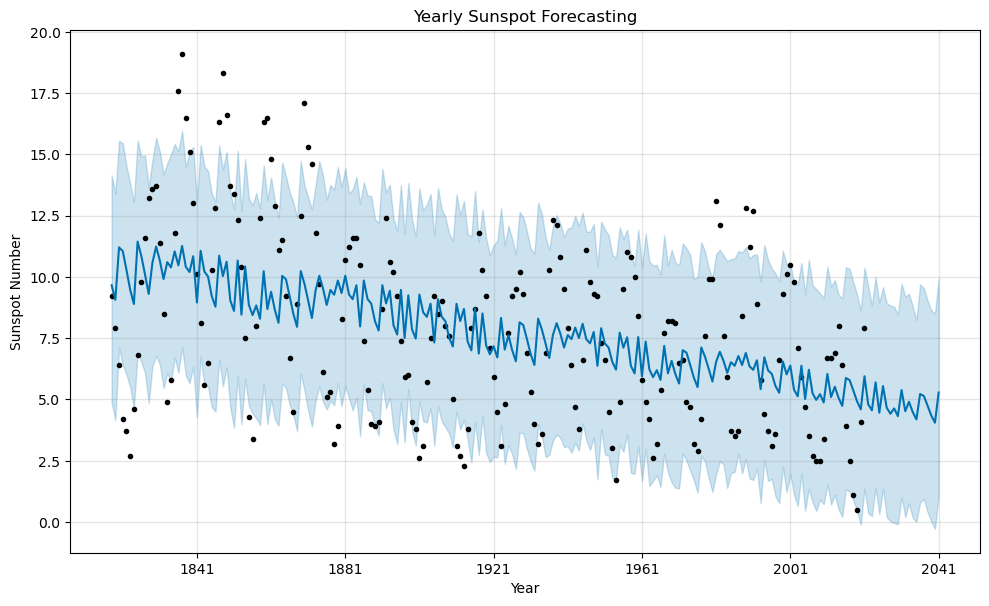

Future Predictions:
            ds      yhat  yhat_lower  yhat_upper
204 2021-12-31  4.806328    0.357660    9.624856
205 2022-12-31  4.556200    0.242417    8.826790
206 2023-12-31  5.698171    1.387352   10.005402
207 2024-12-31  4.458671    0.320369    8.961698
208 2025-12-31  5.546140    1.361009    9.580453
209 2026-12-31  4.662177    0.195801    8.934598
210 2027-12-31  4.417285    0.023625    8.827028
211 2028-12-31  4.633570   -0.036515    8.789260
212 2029-12-31  4.321617   -0.092008    8.470728
213 2030-12-31  5.383683    1.014556    9.721403
214 2031-12-31  4.519579    0.203705    9.188230
215 2032-12-31  4.904455    0.765583    9.313602
216 2033-12-31  4.491208    0.178911    8.797693
217 2034-12-31  4.186069    0.011188    8.243759
218 2035-12-31  5.222779    0.798060    9.695889
219 2036-12-31  5.143639    0.935657    9.545082
220 2037-12-31  4.754282    0.409716    9.046681
221 2038-12-31  4.350353    0.031716    8.646285
222 2039-12-31  4.052076   -0.281966    8.498560


In [30]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "SN_y_tot_V2.0.csv"  # Path to the uploaded file
data = pd.read_csv(file_path, delimiter=';', header=None, names=[
    "Year", "Year_Fraction", "Sunspot_Number", "Standard_Deviation", "Number_of_Observations", "Definitive"
])

# Filter required columns
data = data[["Year", "Sunspot_Number"]]
data = data[data["Sunspot_Number"] >= 0]  # Remove missing values (-1)

# Convert Year column to datetime format
data["ds"] = pd.to_datetime(data["Year"], format='%Y')
data = data[["ds", "Sunspot_Number"]]

# Rename columns for Prophet
data = data.rename(columns={"Sunspot_Number": "y"})

# Initialize the Prophet model
model = Prophet(
    growth="linear",  # Growth type
    yearly_seasonality=True,  # Enable yearly seasonality
    seasonality_mode="multiplicative"  # Default seasonality mode
)

# Custom seasonality
model.add_seasonality(name='custom_yearly', period=11, fourier_order=5)  # 11-year cycle, solar trend

# Fit the model
model.fit(data)

# Create a dataframe for future predictions (1, 10, 20 years into the future)
future = model.make_future_dataframe(periods=20, freq='Y')
forecast = model.predict(future)

# Evaluate the model using historical data
historical = forecast[forecast['ds'] <= data['ds'].max()]

mae = mean_absolute_error(data['y'], historical['yhat'][:len(data)])
mape = mean_absolute_percentage_error(data['y'], historical['yhat'][:len(data)])
r2 = r2_score(data['y'], historical['yhat'][:len(data)])

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R^2 Score: {r2}")

# Plot the forecast
fig = model.plot(forecast)
plt.title("Yearly Sunspot Forecasting")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

# Tabular format of predictions
print("Future Predictions:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))
